# MLP Classifier

In [1]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

RANDOM_STATE = 42

Escolhi o MLPClassifier pela API simples e facilidade de configuração

In [2]:
def plot_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)

  # Plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.set(font_scale=1.4)  # for label size
  sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

def print_metrics(y_test, y_pred):
    print('PRED SCORES')
    print('Accuracy Score - [(tp + tn) / (tp + tn + fp + fn)]:', accuracy_score(y_test, y_pred))  
    print('F1 Score - [2 * (precision * recall / (precision + recall))] :', f1_score(y_test, y_pred)) 
    print('Precision - [tp / (tp + fp)]:', precision_score(y_test, y_pred)) 
    print('Recall - [tp / (tp + fn)]:', recall_score(y_test, y_pred))

In [3]:
original_titanic_df = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

In [4]:
df = original_titanic_df.copy()

median_age = original_titanic_df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

# encoding
le = LabelEncoder()
df['Sex_Encoded'] = le.fit_transform(df['Sex'])
df.drop(['Sex'], axis=1, inplace=True)

df = df.copy()
y = df["Survived"]
X = df
X.drop("Survived", axis=1, inplace=True)

scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=RANDOM_STATE)

X_train.head(3)

/var/folders/jq/tdq0h8rj1zdbxsbs18vhfp0h0000gp/T/ipykernel_28645/1166652709.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


,Pclass,Age,SibSp,Parch,Fare,Sex_Encoded
445,-1.566107,-1.949034,-0.474545,2.008933,0.999770,0.737695
650,0.827377,-0.104637,-0.474545,-0.473674,-0.489442,0.737695
172,0.827377,-2.179583,0.432793,0.767630,-0.424256,-1.355574


## Baseline

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


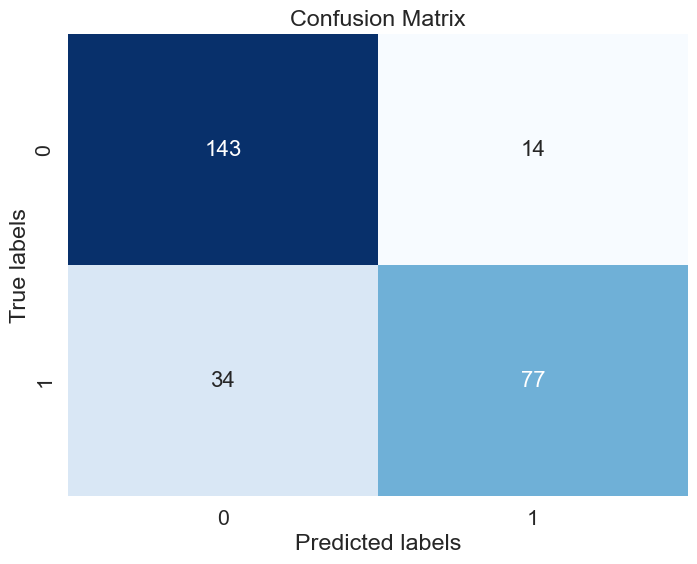

In [5]:
baseline_clf = MLPClassifier(random_state=RANDOM_STATE)
baseline_clf.fit(X_train, y_train)

y_pred_baseline = baseline_clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred_baseline)

In [6]:
print_metrics(y_test, y_pred_baseline)

PRED SCORES
Accuracy Score - [(tp + tn) / (tp + tn + fp + fn)]: 0.8208955223880597
F1 Score - [2 * (precision * recall / (precision + recall))] : 0.7623762376237624
Precision - [tp / (tp + fp)]: 0.8461538461538461
Recall - [tp / (tp + fn)]: 0.6936936936936937


## Modficando Activation Function

In [7]:
param_grid = {
    "activation": ["identity", "logistic", "tanh", "relu"]
}

act_func_clf = MLPClassifier(random_state=42)

grid_search_gb = GridSearchCV(
    act_func_clf, 
    param_grid, 
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

best_result_1 = grid_search_gb.fit(X_train, y_train)
best_result_1.best_params_

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

{'activation': 'tanh'}

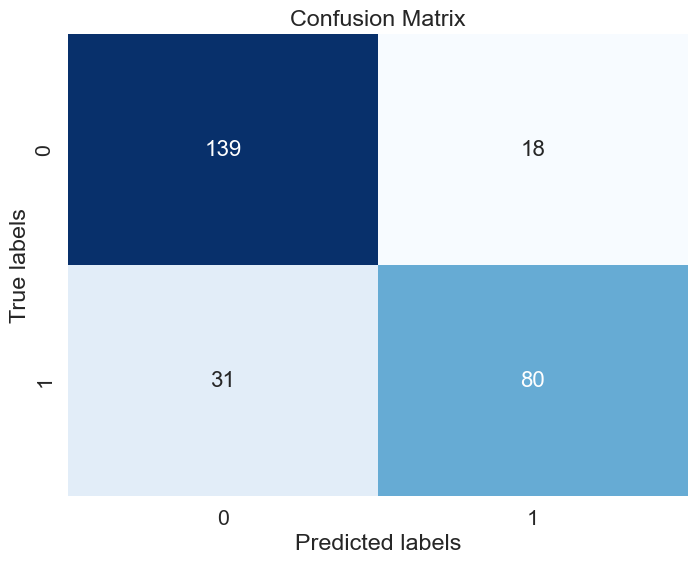

In [8]:
y_pred_activation = best_result_1.best_estimator_.predict(X_test)
plot_confusion_matrix(y_test, y_pred_activation)

In [9]:
print_metrics(y_test, y_pred_activation)

PRED SCORES
Accuracy Score - [(tp + tn) / (tp + tn + fp + fn)]: 0.8171641791044776
F1 Score - [2 * (precision * recall / (precision + recall))] : 0.7655502392344498
Precision - [tp / (tp + fp)]: 0.8163265306122449
Recall - [tp / (tp + fn)]: 0.7207207207207207


## Modificando contagem de Hidden Layers

In [10]:
param_grid = {
    "hidden_layer_sizes": [(100,), (100, 100), (100, 100, 100), (100, 100, 100, 100)]
}

hidden_layer_clf = MLPClassifier(
    random_state=42,
    activation="tanh"
)

grid_search2 = GridSearchCV(
    hidden_layer_clf, 
    param_grid, 
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

best_result_2 = grid_search2.fit(X_train, y_train)
best_result_2.best_params_

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

{'hidden_layer_sizes': (100,)}

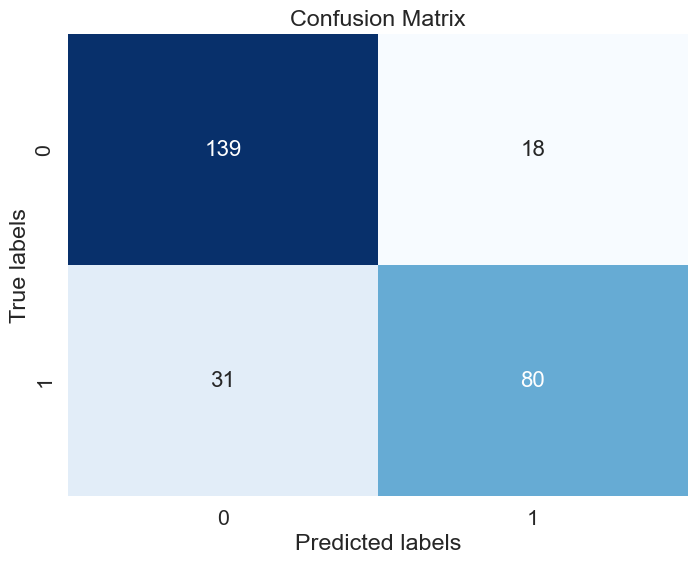

In [11]:
y_pred_laycount = best_result_2.best_estimator_.predict(X_test)
plot_confusion_matrix(y_test, y_pred_laycount)

In [12]:
print_metrics(y_test, y_pred_laycount)

PRED SCORES
Accuracy Score - [(tp + tn) / (tp + tn + fp + fn)]: 0.8171641791044776
F1 Score - [2 * (precision * recall / (precision + recall))] : 0.7655502392344498
Precision - [tp / (tp + fp)]: 0.8163265306122449
Recall - [tp / (tp + fn)]: 0.7207207207207207


## Modificando número de neurônios em cada Layer

In [20]:
param_grid = {
    "hidden_layer_sizes": [(25,), (50,), (100,), (200,), (300,), (400,), (500,)]
}

neuron_count_clf = MLPClassifier(
    random_state=42,
    activation="tanh"
)

grid_search3 = GridSearchCV(
    neuron_count_clf, 
    param_grid, 
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

best_result_3 = grid_search3.fit(X_train, y_train)
best_result_3.best_params_

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

{'hidden_layer_sizes': (100,)}

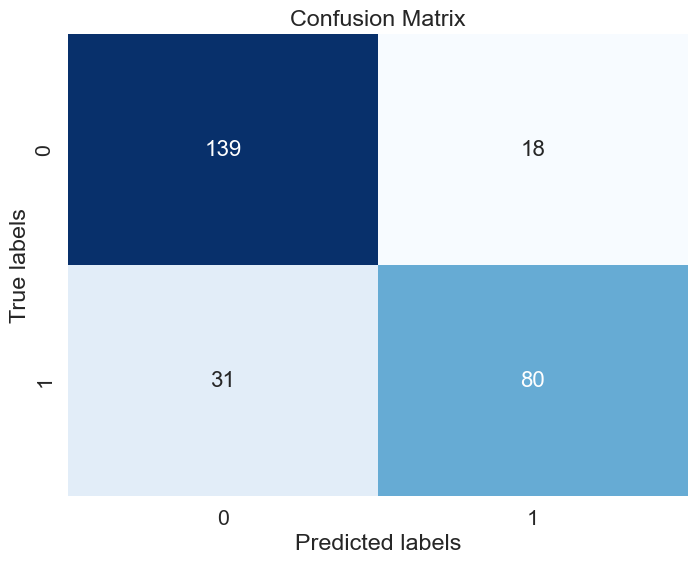

In [21]:
y_pred_neuroncount = best_result_3.best_estimator_.predict(X_test)
plot_confusion_matrix(y_test, y_pred_neuroncount)

In [22]:
print_metrics(y_test, y_pred_neuroncount)

PRED SCORES
Accuracy Score - [(tp + tn) / (tp + tn + fp + fn)]: 0.8171641791044776
F1 Score - [2 * (precision * recall / (precision + recall))] : 0.7655502392344498
Precision - [tp / (tp + fp)]: 0.8163265306122449
Recall - [tp / (tp + fn)]: 0.7207207207207207


## Modificando Learning Rate

In [27]:
param_grid = {
    "learning_rate_init": [0.1, 0.01, 0.001, 0.0001, 0.00001]
}

learning_rate_clf = MLPClassifier(
    random_state=42,
    activation="tanh",
    hidden_layer_sizes=(100,)
)

grid_search4 = GridSearchCV(
    learning_rate_clf, 
    param_grid, 
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

best_result_4 = grid_search4.fit(X_train, y_train)
best_result_4.best_params_

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

{'learning_rate_init': 0.001}

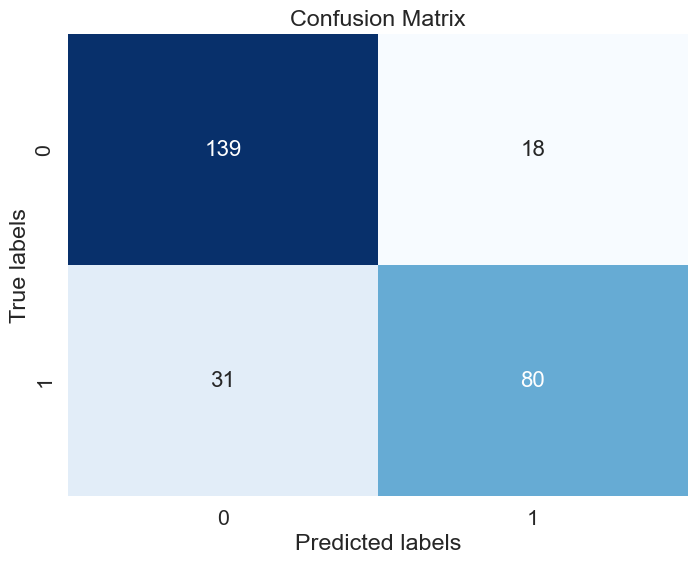

In [41]:
y_pred_lrate = best_result_4.best_estimator_.predict(X_test)
plot_confusion_matrix(y_test, y_pred_lrate)

In [42]:
print_metrics(y_test, y_pred_lrate)

PRED SCORES
Accuracy Score - [(tp + tn) / (tp + tn + fp + fn)]: 0.8171641791044776
F1 Score - [2 * (precision * recall / (precision + recall))] : 0.7655502392344498
Precision - [tp / (tp + fp)]: 0.8163265306122449
Recall - [tp / (tp + fn)]: 0.7207207207207207


## Modificando Batch Size

In [34]:
param_grid = {
    "batch_size": [100, 150, 200, 250, 300, 350]
}

batch_size_clf = MLPClassifier(
    random_state=42,
    activation="tanh",
    hidden_layer_sizes=(100,)
)

grid_search5 = GridSearchCV(
    batch_size_clf, 
    param_grid, 
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

best_result_5 = grid_search5.fit(X_train, y_train)
best_result_5.best_params_

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

{'batch_size': 100}

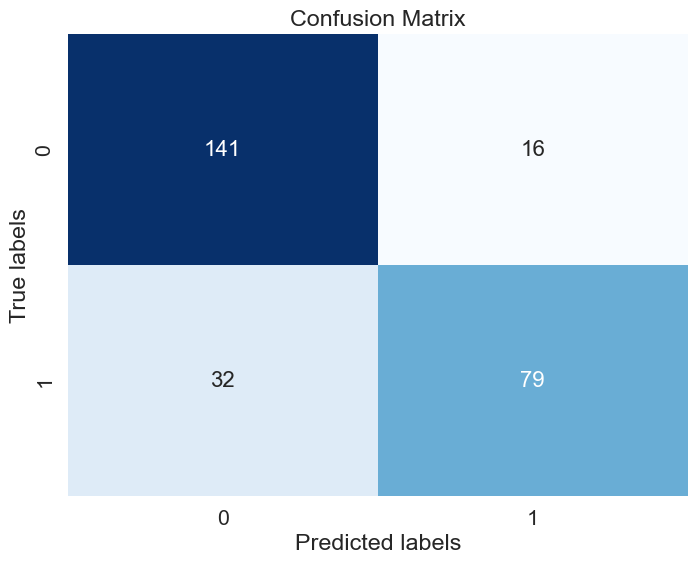

In [35]:
y_pred_batchsize = best_result_5.best_estimator_.predict(X_test)
plot_confusion_matrix(y_test, y_pred_batchsize)

In [36]:
print_metrics(y_test, y_pred_batchsize)

PRED SCORES
Accuracy Score - [(tp + tn) / (tp + tn + fp + fn)]: 0.8208955223880597
F1 Score - [2 * (precision * recall / (precision + recall))] : 0.7669902912621359
Precision - [tp / (tp + fp)]: 0.8315789473684211
Recall - [tp / (tp + fn)]: 0.7117117117117117


## Resultado

Decidi ir acumulando os melhores parâmetros conforme ia os descobrindo para tentar obter um modelo final que superasse o modelo baseline. Acabou não sendo a melhor escolha, pois o baseline ainda se equipara ao último experimento. Uma abordagem melhor deveria ter sido rodar o gridsearch com todos os parametros de uma vez.

## Exp Extra

Aqui irei testar alguns parametros para tentar obter uma acurácia melhor que a baseline

In [38]:
param_grid = {
    "batch_size": [100, 150, 200],
    "activation": ["tanh", "relu"],
    "hidden_layer_sizes": [(25,), (50,), (100,), (200,)],
    "learning_rate_init": [0.1, 0.01, 0.001]
}

extra_clf = MLPClassifier(
    random_state=42,
)

grid_search6 = GridSearchCV(
    extra_clf, 
    param_grid, 
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

best_result_6 = grid_search6.fit(X_train, y_train)
best_result_6.best_params_

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

{'activation': 'relu',
 'batch_size': 150,
 'hidden_layer_sizes': (50,),
 'learning_rate_init': 0.001}

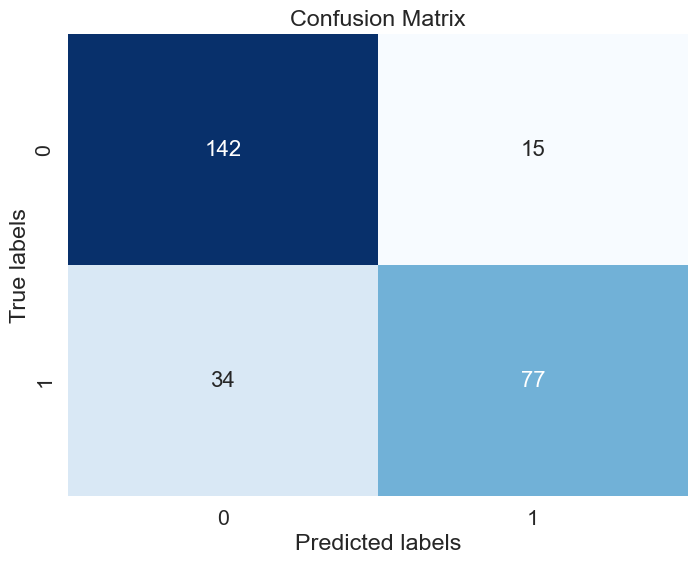

In [39]:
y_pred_extra = best_result_6.best_estimator_.predict(X_test)
plot_confusion_matrix(y_test, y_pred_extra)

In [40]:
print_metrics(y_test, y_pred_extra)

PRED SCORES
Accuracy Score - [(tp + tn) / (tp + tn + fp + fn)]: 0.8171641791044776
F1 Score - [2 * (precision * recall / (precision + recall))] : 0.7586206896551724
Precision - [tp / (tp + fp)]: 0.8369565217391305
Recall - [tp / (tp + fn)]: 0.6936936936936937


Novamente tentando melhorar a acurácia eu falhei em superar o baseline. Isso pode ser devido a uma miríade de motivos que não convém a essa atividade, mas foi cumprido o objetivo de testar diferenter hiperparâmetros de um MLP.